In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
from scipy.stats import f_oneway
%matplotlib inline

Нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего. Всего пользователям показывались три варианта:

A – прямоугольные 16:9
B – квадратные
C – прямоугольные 12:4

In [5]:
df_1 = pd.read_csv('C:/Users/mgika/Documents/KK_Data_analyst/statistics/5_task_1.csv')
df_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [41]:
df_1.query('group == "A"').events.describe()

count    10000.000000
mean        29.579600
std         10.079376
min         -6.000000
25%         23.000000
50%         30.000000
75%         36.000000
max         63.000000
Name: events, dtype: float64

In [42]:
df_1.query('group == "B"').events.describe()

count    10000.00000
mean        37.61360
std          9.84836
min          0.00000
25%         31.00000
50%         38.00000
75%         44.00000
max         75.00000
Name: events, dtype: float64

In [43]:
df_1.query('group == "C"').events.describe()

count    10000.000000
mean        27.470300
std          9.959048
min         -7.000000
25%         21.000000
50%         27.000000
75%         34.000000
max         62.000000
Name: events, dtype: float64

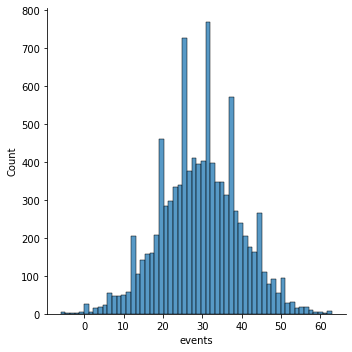

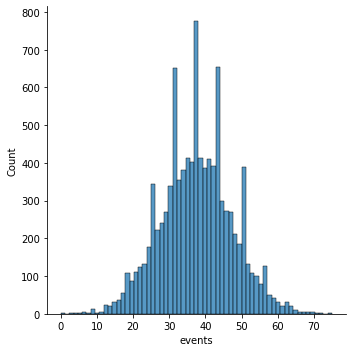

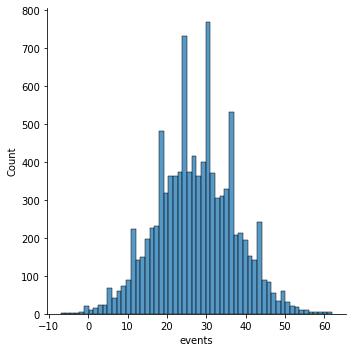

In [9]:
sns.displot(df_1.query('group == "A"').events)
sns.displot(df_1.query('group == "B"').events)
sns.displot(df_1.query('group == "C"').events)

Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

In [16]:
stat, p = levene(df_1.query('group == "A"').events, 
                   df_1.query('group == "B"').events,
                   df_1.query('group == "C"').events)
p

0.1041327199523974

In [17]:
# Levene test
levene(df_1.query('group == "A"').events, 
                   df_1.query('group == "B"').events,
                   df_1.query('group == "C"').events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

Также убедитесь, что данные распределены нормально, применив тест Шапиро-Уилка. Перед применением критерия при проверке на нормальность обязательно сделайте семплирование (1000 наблюдений), так как на больших выборках могут получаться неверные результаты. Для воспроизводимости результата используйте параметр random_state=17 в методе sample.

In [30]:
# Shapiro test
stats, shapiro(df_1.query('group == "A"').events.sample(1000, random_state = 17))

(<module 'scipy.stats' from 'C:\\Users\\mgika\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\scipy\\stats\\__init__.py'>,
 ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714))

In [31]:
stats, shapiro(df_1.query('group == "B"').events.sample(1000, random_state = 17))

(<module 'scipy.stats' from 'C:\\Users\\mgika\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\scipy\\stats\\__init__.py'>,
 ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596))

In [32]:
stats, shapiro(df_1.query('group == "C"').events.sample(1000, random_state = 17))

(<module 'scipy.stats' from 'C:\\Users\\mgika\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\scipy\\stats\\__init__.py'>,
 ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497))

In [38]:
# однофакторный дисперсионный анализ
f_oneway(df_1.query('group == "A"').events,
         df_1.query('group == "B"').events,
         df_1.query('group == "C"').events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [39]:
# критерий Тьюки
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
print(pairwise_tukeyhsd(df_1.events, df_1.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


Проверим, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

In [45]:
df_2 = pd.read_csv('C:/Users/mgika/Documents/KK_Data_analyst/statistics/5_task_2.csv')
df_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


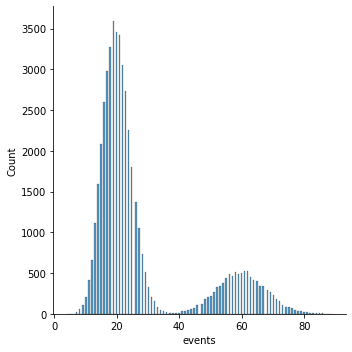

In [55]:
sns.displot(df_2.query('group == "control"').events)

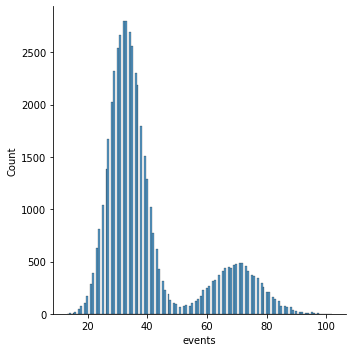

In [56]:
sns.displot(df_2.query('group == "test"').events)

In [58]:
np.std(df_2.query('group == "control" & segment == "high"').events) #.round(2)

7.804956589245068

In [61]:
df_2 = df_2.assign(combination = df_2['group'] + '/' + df_2['segment'])

In [84]:
# многофакторный дисперсионный анализ
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_2_lm = ols('events ~ segment + group + segment:group', data = df_2).fit() # set the model
table = sm.stats.anova_lm(df_2_lm, typ=2) # analysis
print(table)

                     sum_sq       df              F         PR(>F)
segment        2.362480e+07      1.0  689756.377484   0.000000e+00
group          3.837195e+06      1.0  112031.864119   0.000000e+00
segment:group  3.664244e+04      1.0    1069.823273  2.060261e-233
Residual       3.424956e+06  99996.0            NaN            NaN


In [85]:
# критерий Тьюки
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
print(pairwise_tukeyhsd(df_2.events, df_2.combination))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control/high control/low -39.9392 0.001 -40.1073 -39.7711   True
control/high   test/high   9.9677 0.001   9.7551  10.1803   True
control/high    test/low -26.9449 0.001  -27.113 -26.7768   True
 control/low   test/high  49.9069 0.001  49.7388   50.075   True
 control/low    test/low  12.9944 0.001   12.888  13.1007   True
   test/high    test/low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


NameError: name 'plt' is not defined

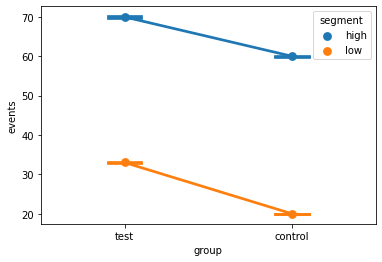

In [87]:
# Визуализируем результаты теста

sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = df_2, capsize = .2)
plt.xlabel('group')
plt.ylabel('events')
plt.legend(title = 'segment')

NameError: name 'plt' is not defined

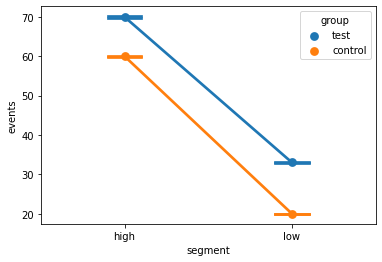

In [88]:
sns.pointplot(x = 'segment', y = 'events', hue = 'group', data = df_2, capsize = .2)
plt.xlabel('group')
plt.ylabel('events')
plt.legend(title = 'segment')